<a href="https://colab.research.google.com/github/EnginBoraIlan/DSA210_project/blob/main/DSA210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Step 1: Specify the file path
# Replace 'your_file_path_here' with the actual path to your .txt file
file_path = '/content/Like List.txt'  # Example path if you're uploading to Colab

# Step 2: Read the .txt file line by line
with open(file_path, 'r') as f:
    lines = f.readlines()

# Step 3: Extract Date and Links
data = []
for line in lines:
    if line.startswith("Date:"):
        date = line.split("Date:")[1].strip()
    if line.startswith("Link:"):
        data.append({"Date": date, "Link": line.split("Link:")[1].strip()})

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Step 4: Parse the "Date" column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 5: Extract the date (ignoring time)
df['Day'] = df['Date'].dt.date

# Step 6: Count the number of likes (videos) per day
likes_per_day = df.groupby('Day').size().reset_index(name='Total Likes')

# Step 7: Display the result
print("Total videos liked per day:")
print(likes_per_day)

# Step 8: Save the results to a CSV file
output_path = '/content/likes_per_day.csv'  # Example output path in Colab
likes_per_day.to_csv(output_path, index=False)
print(f"The results have been saved to {output_path}.")


Total videos liked per day:
            Day  Total Likes
0    2021-05-12          134
1    2021-05-13            1
2    2021-05-15           14
3    2021-05-17            6
4    2021-05-18           20
..          ...          ...
524  2024-11-19           17
525  2024-11-23            7
526  2024-11-24            3
527  2024-11-26            5
528  2024-11-27            1

[529 rows x 2 columns]
The results have been saved to /content/likes_per_day.csv.


In [2]:
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Specify the file path
file_path = '/content/liked_posts.html'  # Replace with your actual file path

# Step 2: Read and parse the HTML file
with open(file_path, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

# Step 3: Extract date and time information
entries = soup.find_all(text=True)  # Extract all text content from the HTML
timestamps = [entry.strip() for entry in entries if any(month in entry for month in ["Oca", "Şub", "Mar", "Nis", "May", "Haz", "Tem", "Ağu", "Eyl", "Eki", "Kas", "Ara"])]

# Step 4: Map abbreviated Turkish month names to English
month_map_abbreviated = {
    "Oca": "Jan", "Şub": "Feb", "Mar": "Mar", "Nis": "Apr",
    "May": "May", "Haz": "Jun", "Tem": "Jul", "Ağu": "Aug",
    "Eyl": "Sep", "Eki": "Oct", "Kas": "Nov", "Ara": "Dec"
}
for turkish, english in month_map_abbreviated.items():
    timestamps = [timestamp.replace(turkish, english) for timestamp in timestamps]

# Step 5: Create a DataFrame
df = pd.DataFrame({'Timestamp': timestamps})

# Step 6: Convert the timestamps to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Step 7: Drop rows with invalid timestamps (if any)
df = df.dropna(subset=['Timestamp'])

# Step 8: Extract the date and calculate total likes per day
df['Day'] = df['Timestamp'].dt.date
likes_per_day = df.groupby('Day').size().reset_index(name='Total Likes')

# Step 9: Display the result
print("Total likes per day:")
print(likes_per_day)

# Step 10: Save the results to a CSV file
output_path = '/content/instagram_likes_per_day.csv'
likes_per_day.to_csv(output_path, index=False)
print(f"The results have been saved to {output_path}.")


Total likes per day:
            Day  Total Likes
0    2023-11-29           22
1    2023-11-30            4
2    2023-12-01            4
3    2023-12-05            2
4    2023-12-09            2
..          ...          ...
175  2024-10-31            1
176  2024-11-02            1
177  2024-11-10            3
178  2024-11-16            2
179  2024-11-27            1

[180 rows x 2 columns]
The results have been saved to /content/instagram_likes_per_day.csv.


<ipython-input-2-e5b9f72a9e9a>:12: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  entries = soup.find_all(text=True)  # Extract all text content from the HTML


In [3]:
import pandas as pd

# Step 1: Load the two CSV files
tiktok_file_path = '/content/likes_per_day.csv'  # Replace with TikTok CSV file path
instagram_file_path = '/content/instagram_likes_per_day.csv'  # Replace with Instagram CSV file path

# Read the CSV files into DataFrames
tiktok_df = pd.read_csv(tiktok_file_path)
instagram_df = pd.read_csv(instagram_file_path)

# Step 2: Check the column names in both DataFrames
print("TikTok Columns:", tiktok_df.columns)
print("Instagram Columns:", instagram_df.columns)

# Ensure both DataFrames have a common 'Date' column for merging
if 'Day' in tiktok_df.columns:
    tiktok_df.rename(columns={'Day': 'Date'}, inplace=True)
if 'Day' in instagram_df.columns:
    instagram_df.rename(columns={'Day': 'Date'}, inplace=True)

# Rename Total Likes columns for clarity
tiktok_df.rename(columns={'Total Likes': 'TikTok Likes'}, inplace=True)
instagram_df.rename(columns={'Total Likes': 'Instagram Likes'}, inplace=True)

# Step 3: Merge the two DataFrames on the 'Date' column
merged_df = pd.merge(tiktok_df, instagram_df, on='Date', how='outer')

# Step 4: Fill NaN values with 0 (in case a platform has no likes on a given day)
merged_df.fillna(0, inplace=True)

# Step 5: Add a total likes column
merged_df['Total Likes'] = merged_df['TikTok Likes'] + merged_df['Instagram Likes']

# Step 6: Display the merged data
print("Merged Data:")
print(merged_df)

# Step 7: Save the merged data to a new CSV file
output_path = '/content/total_likes_per_day.csv'
merged_df.to_csv(output_path, index=False)
print(f"Merged data has been saved to {output_path}.")


TikTok Columns: Index(['Day', 'Total Likes'], dtype='object')
Instagram Columns: Index(['Day', 'Total Likes'], dtype='object')
Merged Data:
           Date  TikTok Likes  Instagram Likes  Total Likes
0    2021-05-12         134.0              0.0        134.0
1    2021-05-13           1.0              0.0          1.0
2    2021-05-15          14.0              0.0         14.0
3    2021-05-17           6.0              0.0          6.0
4    2021-05-18          20.0              0.0         20.0
..          ...           ...              ...          ...
561  2024-11-19          17.0              0.0         17.0
562  2024-11-23           7.0              0.0          7.0
563  2024-11-24           3.0              0.0          3.0
564  2024-11-26           5.0              0.0          5.0
565  2024-11-27           1.0              1.0          2.0

[566 rows x 4 columns]
Merged data has been saved to /content/total_likes_per_day.csv.


In [6]:
import pandas as pd

# Load the merged data
file_path = '/content/total_likes_per_day.csv'  # Path to your merged data CSV
merged_df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Define your intervals
intervals = [
    {"start": "2024-05-21", "end": "2024-06-11", "label": "Week 1"},
    {"start": "2024-10-25", "end": "2024-11-14", "label": "Week 2"},
    # Add more intervals as needed
]

# Create empty lists to store in-interval and out-of-interval data
in_interval_data = []
out_of_interval_data = merged_df.copy()  # Start with all data as "out of interval"

# Loop through each interval and filter the data
for interval in intervals:
    start_date = pd.to_datetime(interval["start"])
    end_date = pd.to_datetime(interval["end"])
    label = interval["label"]

    # Filter data for the current interval
    interval_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]
    interval_df['Interval'] = label  # Add an Interval column

    # Add to in-interval data
    in_interval_data.append(interval_df)

    # Remove these rows from out-of-interval data
    out_of_interval_data = out_of_interval_data[~out_of_interval_data['Date'].isin(interval_df['Date'])]

# Combine all in-interval data into a single DataFrame
in_interval_df = pd.concat(in_interval_data, ignore_index=True)

# Save the in-interval data to a CSV
in_interval_output_path = '/content/likes_in_intervals.csv'
in_interval_df.to_csv(in_interval_output_path, index=False)
print(f"In-interval data has been saved to {in_interval_output_path}.")

# Save the out-of-interval data to a CSV
out_interval_output_path = '/content/likes_out_of_intervals.csv'
out_of_interval_data.to_csv(out_interval_output_path, index=False)
print(f"Out-of-interval data has been saved to {out_interval_output_path}.")


In-interval data has been saved to /content/likes_in_intervals.csv.
Out-of-interval data has been saved to /content/likes_out_of_intervals.csv.


<ipython-input-6-8ad51c91e313>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_df['Interval'] = label  # Add an Interval column
<ipython-input-6-8ad51c91e313>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_df['Interval'] = label  # Add an Interval column


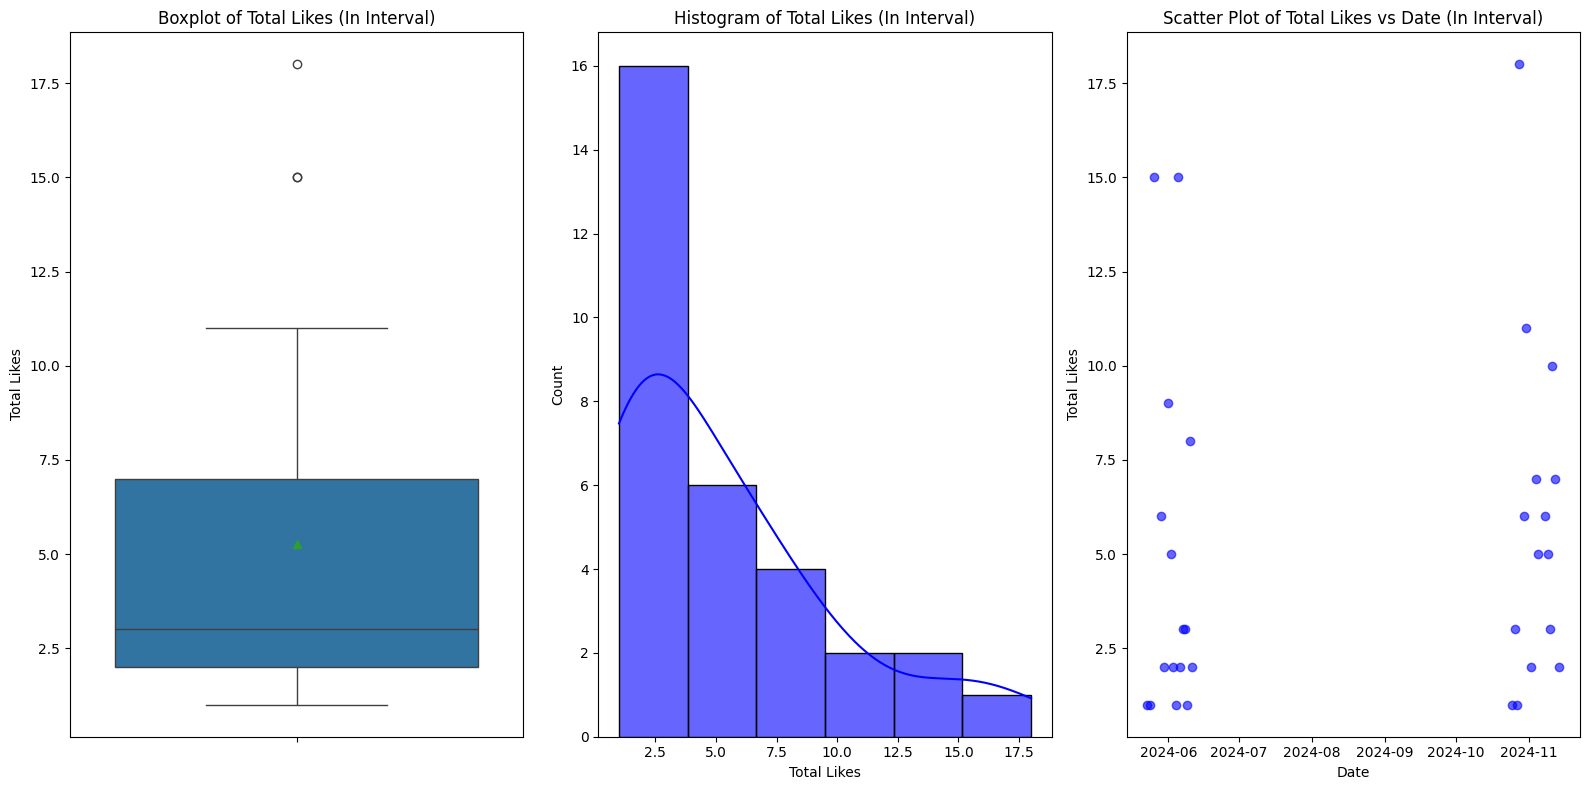

Mean of Total Likes (In Interval): 5.26
Standard Deviation of Total Likes (In Interval): 4.58


In [9]:
# Ensure libraries are imported
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dummy path for testing; replace with actual file path
in_interval_path = '/content/likes_in_intervals.csv'

# Load data
try:
    in_interval_data = pd.read_csv(in_interval_path)
except FileNotFoundError:
    print("Error: Please ensure the input file exists at the specified path.")

# Ensure 'Date' is datetime and sort
in_interval_data['Date'] = pd.to_datetime(in_interval_data['Date'])

# Calculate Mean and Standard Deviation of Total Likes
mean_likes = in_interval_data['Total Likes'].mean()
stdev_likes = in_interval_data['Total Likes'].std()

# Visualization
plt.figure(figsize=(16, 8))

# Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=in_interval_data['Total Likes'], showmeans=True)
plt.title("Boxplot of Total Likes (In Interval)")

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(in_interval_data['Total Likes'], kde=True, color='blue', alpha=0.6)
plt.title("Histogram of Total Likes (In Interval)")

# Scatter plot
plt.subplot(1, 3, 3)
plt.scatter(in_interval_data['Date'], in_interval_data['Total Likes'], alpha=0.6, color='blue')
plt.title("Scatter Plot of Total Likes vs Date (In Interval)")
plt.xlabel("Date")
plt.ylabel("Total Likes")

plt.tight_layout()
plt.show()

# Display mean and standard deviation
print(f"Mean of Total Likes (In Interval): {mean_likes:.2f}")
print(f"Standard Deviation of Total Likes (In Interval): {stdev_likes:.2f}")


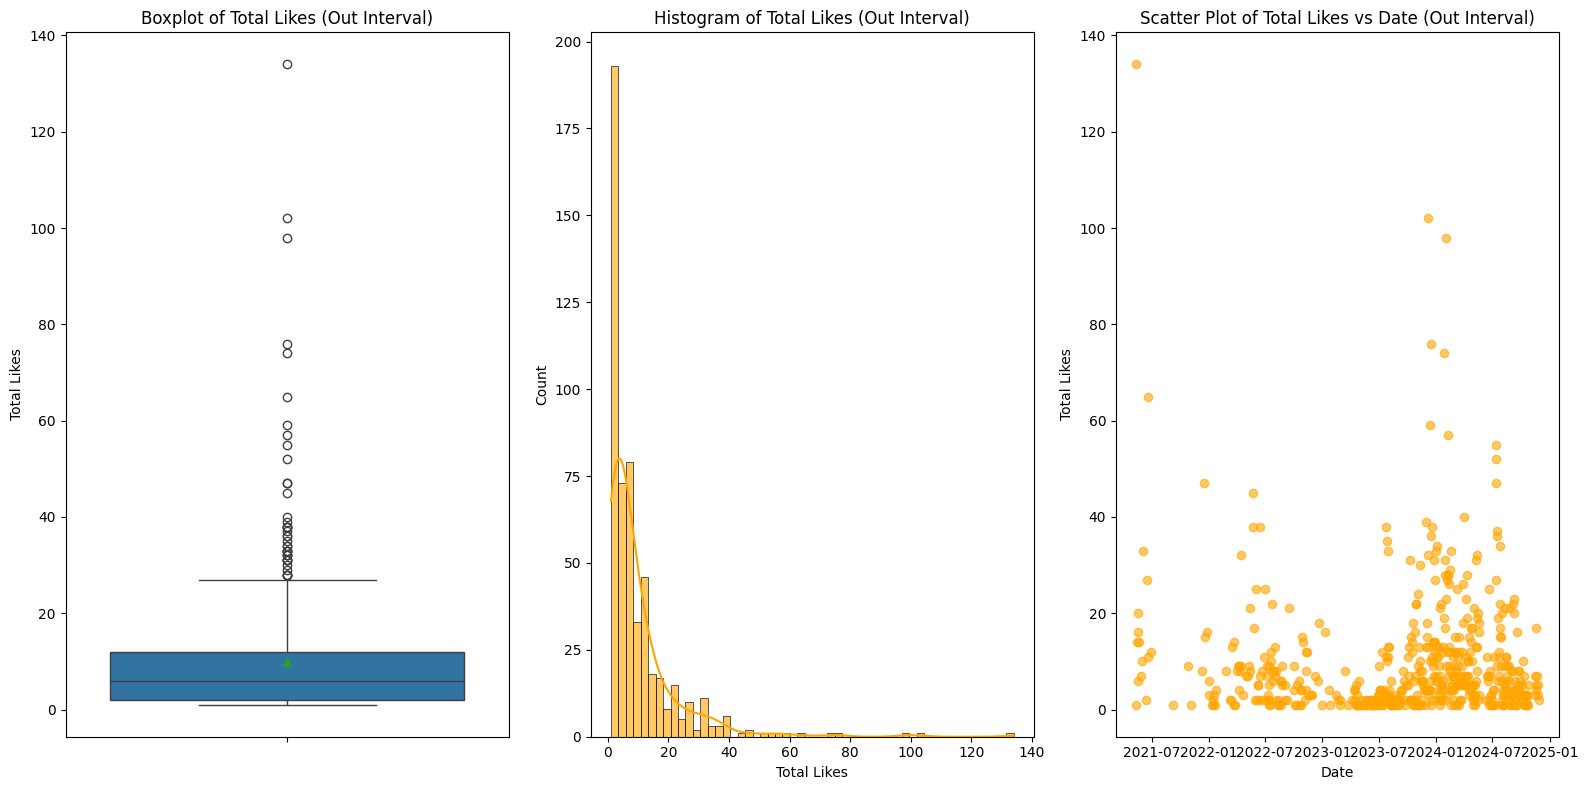

Mean of Total Likes (Out Interval): 9.84
Standard Deviation of Total Likes (Out Interval): 13.32


In [10]:
# Dummy path for testing; replace with actual file path
out_interval_path = '/content/likes_out_of_intervals.csv'

# Load data
try:
    out_interval_data = pd.read_csv(out_interval_path)
except FileNotFoundError:
    print("Error: Please ensure the input file exists at the specified path.")

# Ensure 'Date' is datetime and sort
out_interval_data['Date'] = pd.to_datetime(out_interval_data['Date'])

# Calculate Mean and Standard Deviation of Total Likes
mean_likes_out = out_interval_data['Total Likes'].mean()
stdev_likes_out = out_interval_data['Total Likes'].std()

# Visualization
plt.figure(figsize=(16, 8))

# Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=out_interval_data['Total Likes'], showmeans=True)
plt.title("Boxplot of Total Likes (Out Interval)")

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(out_interval_data['Total Likes'], kde=True, color='orange', alpha=0.6)
plt.title("Histogram of Total Likes (Out Interval)")

# Scatter plot
plt.subplot(1, 3, 3)
plt.scatter(out_interval_data['Date'], out_interval_data['Total Likes'], alpha=0.6, color='orange')
plt.title("Scatter Plot of Total Likes vs Date (Out Interval)")
plt.xlabel("Date")
plt.ylabel("Total Likes")

plt.tight_layout()
plt.show()

# Display mean and standard deviation
print(f"Mean of Total Likes (Out Interval): {mean_likes_out:.2f}")
print(f"Standard Deviation of Total Likes (Out Interval): {stdev_likes_out:.2f}")


In [11]:
from scipy.stats import ttest_ind

# Check if in_interval_data and out_interval_data exist
try:
    # Perform hypothesis testing (two-sample t-test)
    t_stat, p_value = ttest_ind(
        in_interval_data['Total Likes'],
        out_interval_data['Total Likes'],
        equal_var=False  # Welch's t-test (does not assume equal variance)
    )

    # Hypothesis Testing
    print("Hypothesis Testing: Are the means of in-interval and out-interval data equal?")
    print(f"H0: Means are equal")
    print(f"H1: Means are not equal")
    print(f"T-Statistic: {t_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")

    # Significance level (commonly used: 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Result: Reject H0. There is a significant difference between the means.")
    else:
        print("Result: Fail to reject H0. No significant difference between the means.")

except NameError:
    print("Error: Please ensure both in_interval_data and out_interval_data are loaded and available.")


Hypothesis Testing: Are the means of in-interval and out-interval data equal?
H0: Means are equal
H1: Means are not equal
T-Statistic: -4.57
P-Value: 0.0000
Result: Reject H0. There is a significant difference between the means.
